In [100]:
from IPython.display import HTML

In [101]:
%%HTML 
  &lt;iframe width="600" height="300"
    src="https://www.youtube.com/embed/nAFUiMgUUzo" frameborder="0" allow="accelerometer; autoplay; encrypted-media; 
    gyroscope; picture-in-picture" allowfullscreen&gt;&lt;/iframe&gt;

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
plt.style.use('fivethirtyeight') #파이브써티에잇 www.fivethirtyeight.com
import warnings
warnings.filterwarnings('ignore') #워닝 무시

In [103]:
regular=pd.read_csv("d:\\data\\baseball\\Regular_Season_Batter.csv")

In [104]:
regular.head()

batter_id batter_name  year team    avg    G   AB   R   H  2B  ...  GDP  \
0          0        가르시아  2018   LG  0.339   50  183  27  62   9  ...    3   
1          1         강경학  2011   한화  0.000    2    1   0   0   0  ...    0   
2          1         강경학  2014   한화  0.221   41   86  11  19   2  ...    1   
3          1         강경학  2015   한화  0.257  120  311  50  80   7  ...    3   
4          1         강경학  2016   한화  0.158   46  101  16  16   3  ...    5   

     SLG    OBP   E  height/weight      year_born   position  \
0  0.519  0.383   9     177cm/93kg  1985년 04월 12일  내야수(우투우타)   
1  0.000  0.000   1     180cm/72kg  1992년 08월 11일  내야수(우투좌타)   
2  0.349  0.337   6     180cm/72kg  1992년 08월 11일  내야수(우투좌타)   
3  0.325  0.348  15     180cm/72kg  1992년 08월 11일  내야수(우투좌타)   
4  0.257  0.232   7     180cm/72kg  1992년 08월 11일  내야수(우투좌타)   

                                   career  starting_salary    OPS  
0  쿠바 Ciego de Avila Maximo Gomez Baez(대)              NaN  0.902  
1                       광주대성초-광주동성중-광주동성고          10000만원  0.000  
2                       광주대성초-광주동성중-광주동성고          10000만원  0.686  
3                       광주대성초-광주동성중-광주동성고          10000만원  0.673  
4                       광주대성초-광주동성중-광주동성고          10000만원  0.489  

[5 rows x 29 columns]

In [105]:
regular.loc[regular['year']==2019].head()

Empty DataFrame
Columns: [batter_id, batter_name, year, team, avg, G, AB, R, H, 2B, 3B, HR, TB, RBI, SB, CS, BB, HBP, SO, GDP, SLG, OBP, E, height/weight, year_born, position, career, starting_salary, OPS]
Index: []

[0 rows x 29 columns]

In [106]:
regular.loc[regular['year']==2019]['OPS']

Series([], Name: OPS, dtype: float64)

In [107]:
regular=regular.loc[~regular['OPS'].isnull(),]

In [108]:
submission=pd.read_csv("d:\\data\\baseball\\submission.csv")

In [109]:
regular.loc[regular['year']==2019].head()

Empty DataFrame
Columns: [batter_id, batter_name, year, team, avg, G, AB, R, H, 2B, 3B, HR, TB, RBI, SB, CS, BB, HBP, SO, GDP, SLG, OBP, E, height/weight, year_born, position, career, starting_salary, OPS]
Index: []

[0 rows x 29 columns]

In [110]:
agg={}
for i in regular.columns:
    agg[i]=[]

In [111]:
for i in submission['batter_name'].unique():
    for j in regular.columns:
        if j in ['batter_id','batter_name','height/weight','year_born','position','starting_salary']:
            agg[j].append(regular.loc[regular['batter_name']==i,j].iloc[0])
        elif j=='year':
            agg[j].append(2019)
        else:
            agg[j].append(0)
regular=pd.concat([regular,pd.DataFrame(agg)])

In [112]:
regular.loc[regular['year']==2019].head()

batter_id batter_name  year team  avg  G  AB  R  H  2B  ...  GDP  SLG  OBP  \
0          1         강경학  2019    0  0.0  0   0  0  0   0  ...    0  0.0  0.0   
1          2         강구성  2019    0  0.0  0   0  0  0   0  ...    0  0.0  0.0   
2          3         강민국  2019    0  0.0  0   0  0  0   0  ...    0  0.0  0.0   
3          4         강민호  2019    0  0.0  0   0  0  0   0  ...    0  0.0  0.0   
4          5         강백호  2019    0  0.0  0   0  0  0   0  ...    0  0.0  0.0   

   E  height/weight      year_born   position  career  starting_salary  OPS  
0  0     180cm/72kg  1992년 08월 11일  내야수(우투좌타)       0          10000만원  0.0  
1  0     180cm/82kg  1993년 06월 09일  외야수(우투좌타)       0           9000만원  0.0  
2  0     176cm/80kg  1992년 01월 10일  내야수(우투우타)       0          20000만원  0.0  
3  0    185cm/100kg  1985년 08월 18일   포수(우투우타)       0           9000만원  0.0  
4  0     184cm/98kg  1999년 07월 29일  외야수(우투좌타)       0          45000만원  0.0  

[5 rows x 29 columns]

In [78]:
print(regular.isnull().sum())

batter_id             0
batter_name           0
year                  0
team                  0
avg                   0
G                     0
AB                    0
R                     0
H                     0
2B                    0
3B                    0
HR                    0
TB                    0
RBI                   0
SB                    0
CS                    0
BB                    0
HBP                   0
SO                    0
GDP                   0
SLG                   0
OBP                   0
E                     0
height/weight       794
year_born             0
position            794
career                0
starting_salary    1096
OPS                   0
dtype: int64


In [79]:
regular.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2648 entries, 0 to 219
Data columns (total 29 columns):
batter_id          2648 non-null int64
batter_name        2648 non-null object
year               2648 non-null int64
team               2648 non-null object
avg                2648 non-null float64
G                  2648 non-null int64
AB                 2648 non-null int64
R                  2648 non-null int64
H                  2648 non-null int64
2B                 2648 non-null int64
3B                 2648 non-null int64
HR                 2648 non-null int64
TB                 2648 non-null int64
RBI                2648 non-null int64
SB                 2648 non-null int64
CS                 2648 non-null int64
BB                 2648 non-null int64
HBP                2648 non-null int64
SO                 2648 non-null int64
GDP                2648 non-null int64
SLG                2648 non-null float64
OBP                2648 non-null float64
E                  2648 non-

In [12]:
regular.columns

Index(['batter_id', 'batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E', 'height/weight', 'year_born', 'position', 'career',
       'starting_salary', 'OPS'],
      dtype='object')

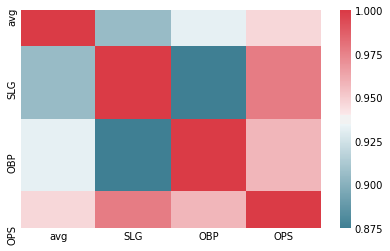

In [13]:
corr = regular.loc[:,regular.dtypes == 'float64'].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

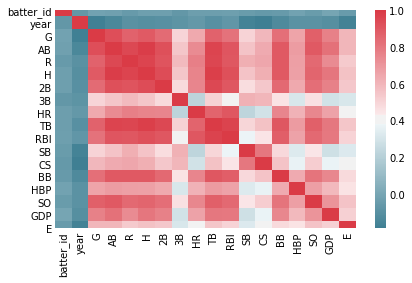

In [14]:
corr = regular.loc[:,regular.dtypes == 'int64'].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

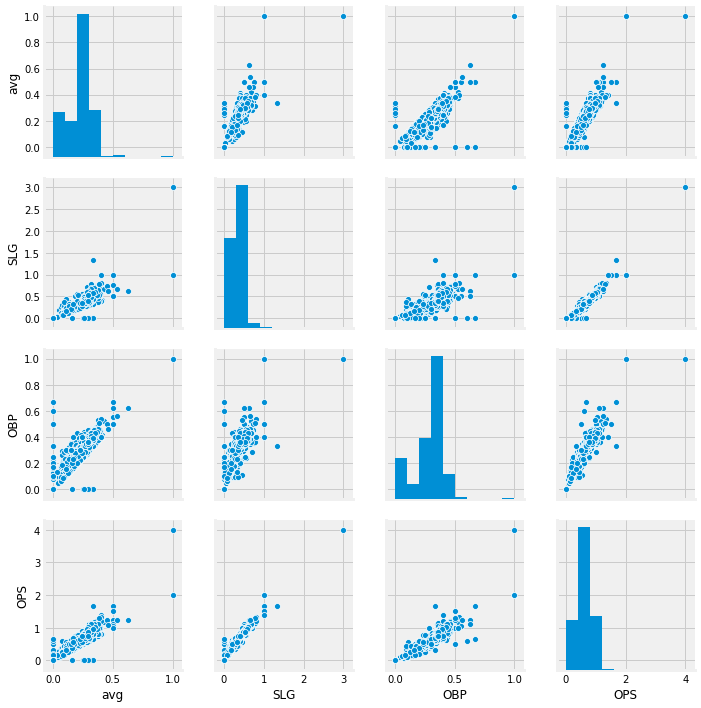

In [15]:
sns.pairplot(regular.loc[:,regular.dtypes == 'float64'])

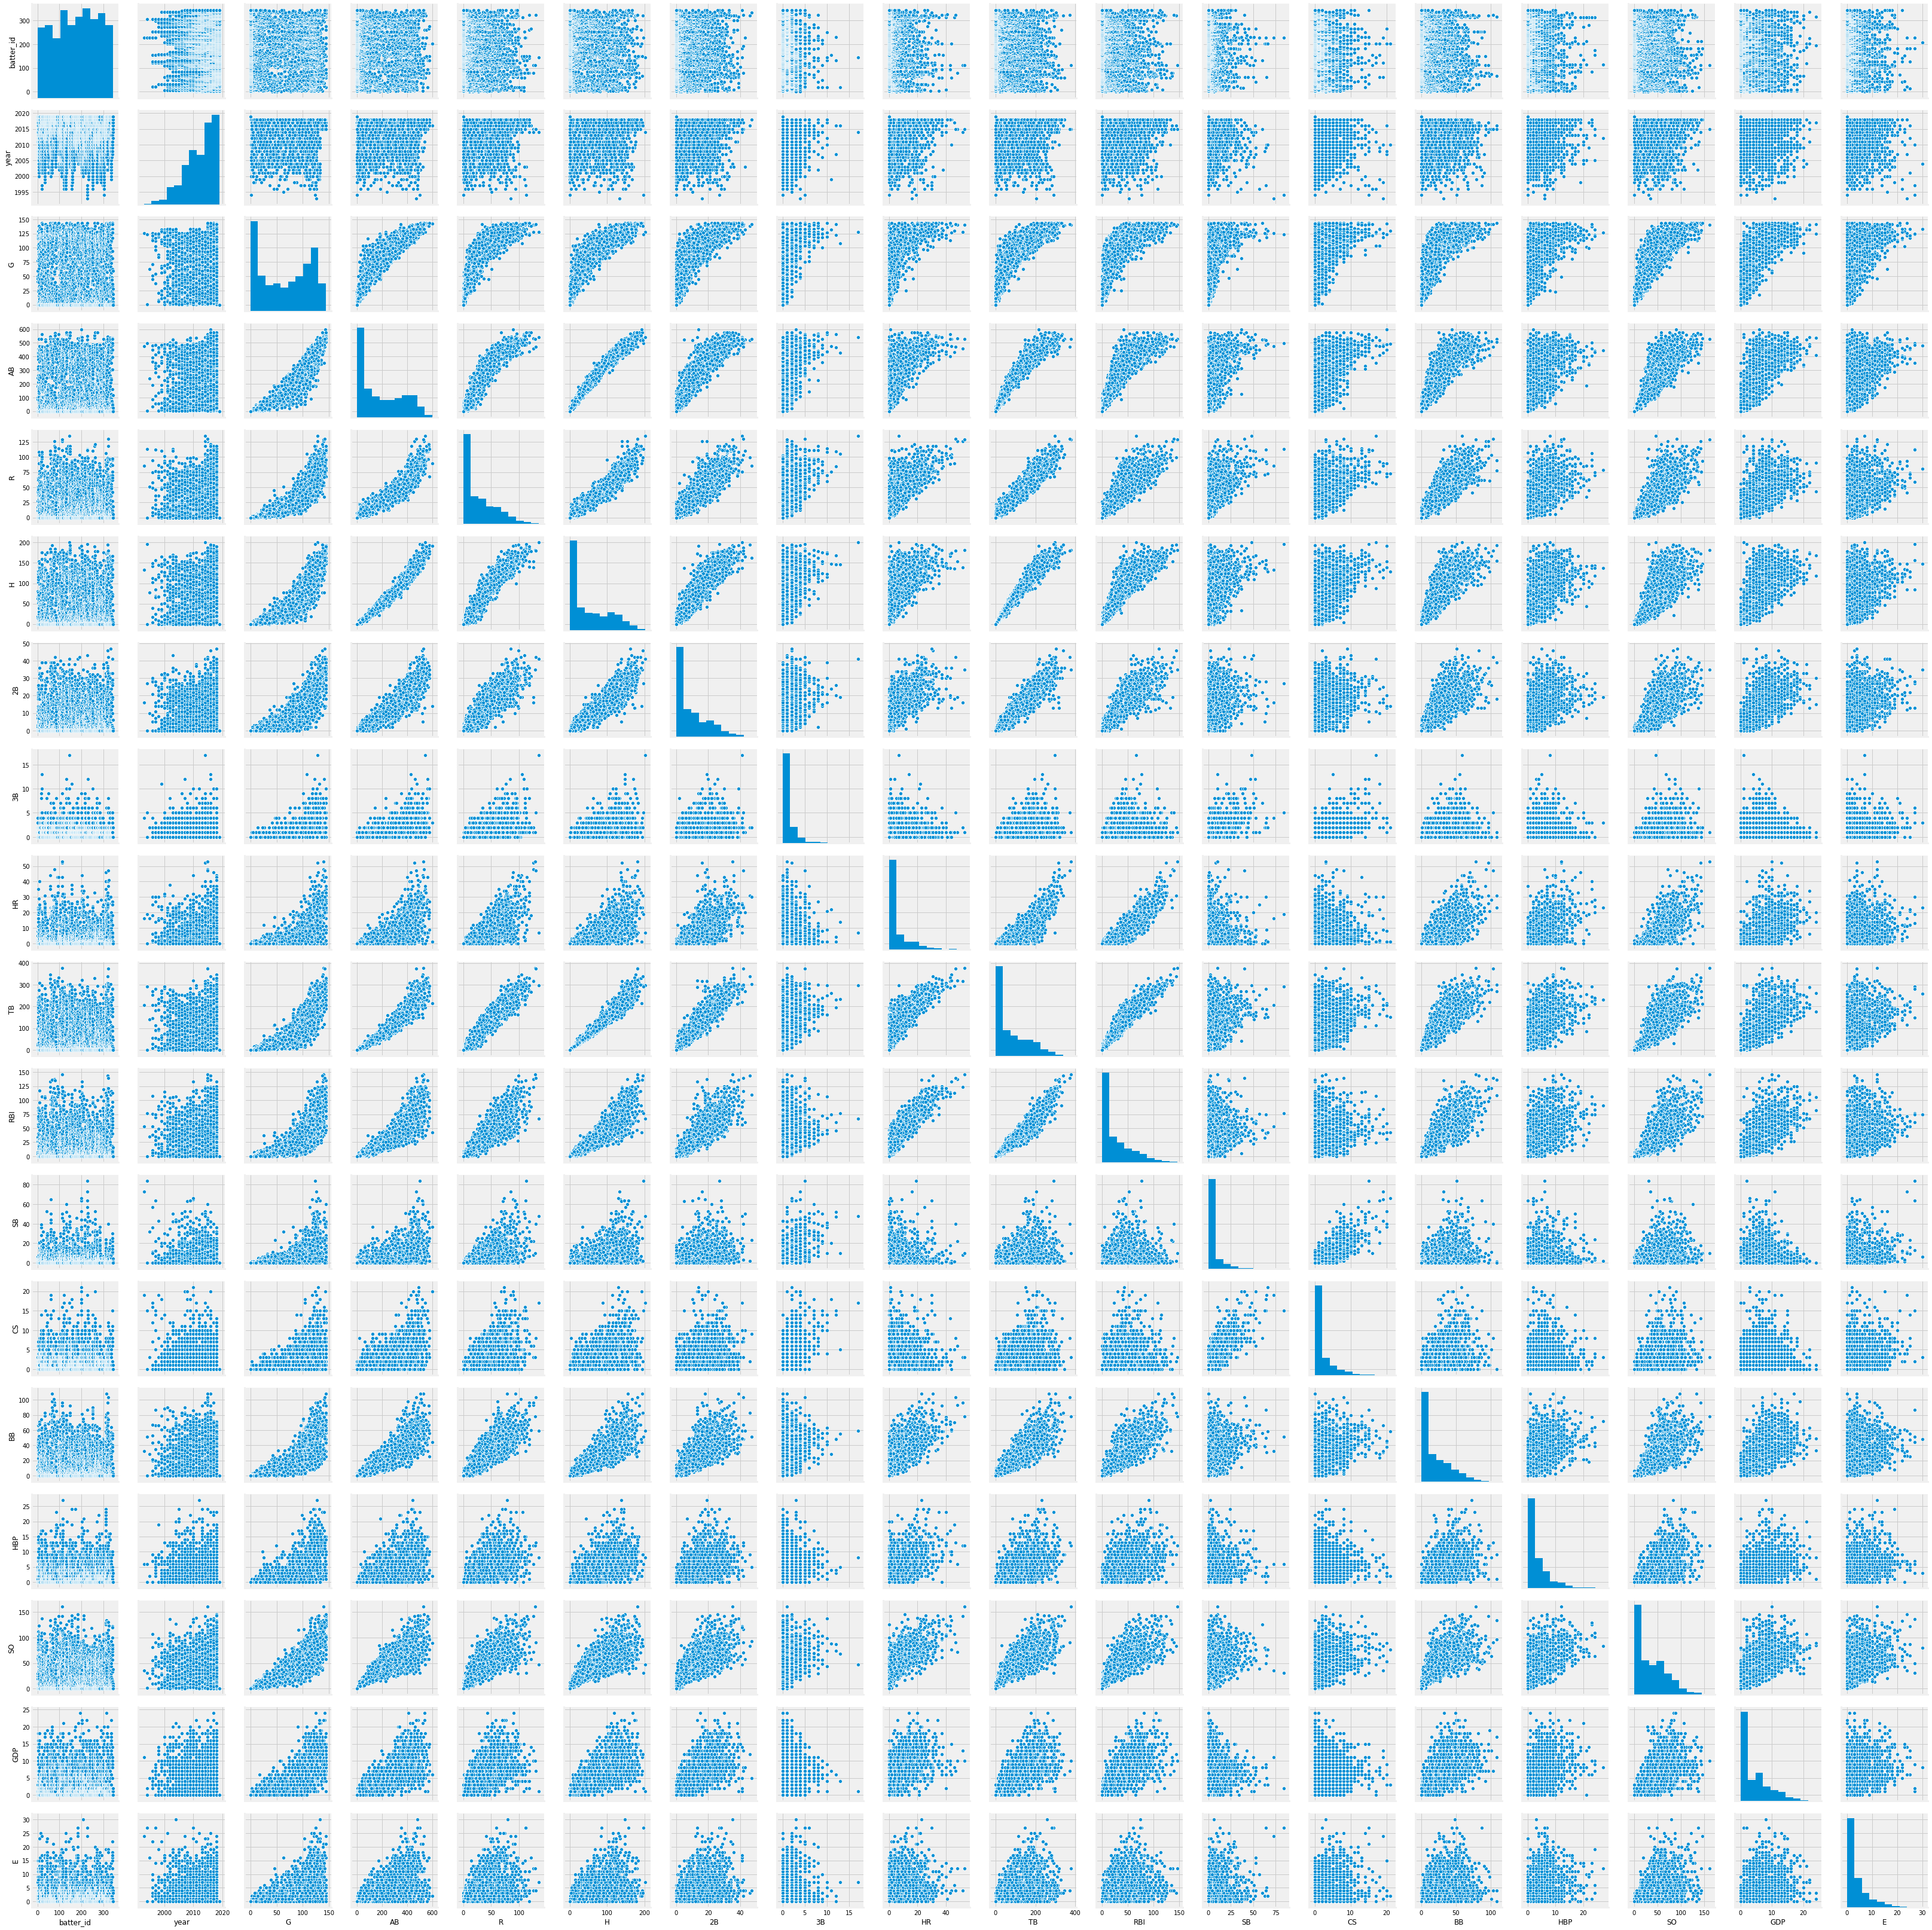

In [16]:
sns.pairplot(regular.loc[:,regular.dtypes == 'int64'])

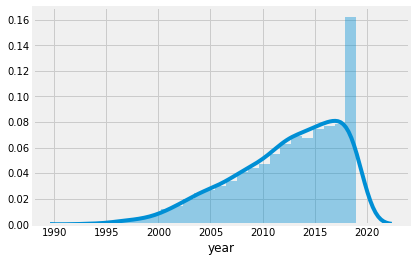

In [17]:
sns.distplot(regular['year'])

In [18]:
regular['year'].describe()

count    2648.000000
mean     2012.250000
std         5.191261
min      1993.000000
25%      2009.000000
50%      2013.000000
75%      2016.250000
max      2019.000000
Name: year, dtype: float64

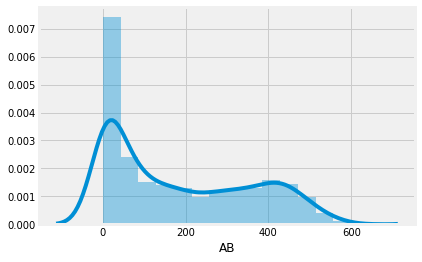

In [19]:
sns.distplot(regular['AB'])

In [20]:
regular['AB'].describe()

count    2648.000000
mean      186.751133
std       171.447888
min         0.000000
25%        23.000000
50%       138.000000
75%       342.000000
max       600.000000
Name: AB, dtype: float64

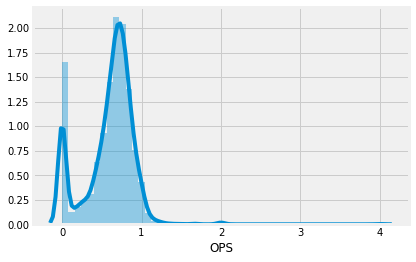

In [21]:
sns.distplot(regular['OPS'].dropna())

In [22]:
regular['OPS'].describe()

count    2648.000000
mean        0.595941
std         0.308147
min         0.000000
25%         0.477229
50%         0.668000
75%         0.786711
max         4.000000
Name: OPS, dtype: float64

Text(0, 0.5, 'OPS')

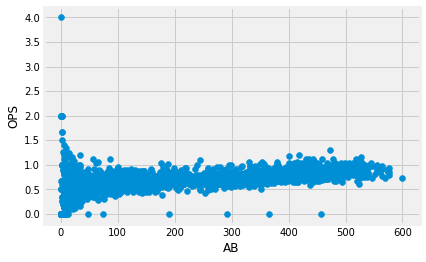

In [23]:
plt.scatter(regular['AB'],regular['OPS'])
plt.xlabel('AB')
plt.ylabel('OPS')

Text(0, 0.5, 'AB')

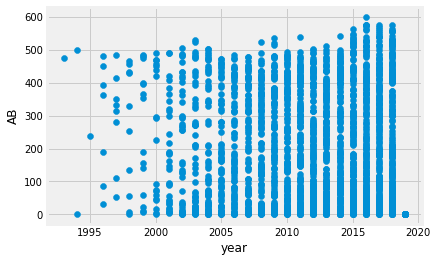

In [24]:
plt.scatter(regular['year'],regular['AB'])
plt.xlabel('year')
plt.ylabel('AB')

In [25]:
regular.groupby('position')['OPS'].mean()

position
내야수(우투양타)    0.235714
내야수(우투우타)    0.606139
내야수(우투좌타)    0.537651
내야수(좌투좌타)    0.691359
외야수(우투양타)    0.542667
외야수(우투우타)    0.588131
외야수(우투좌타)    0.586589
외야수(좌투좌타)    0.596368
포수(우투우타)     0.527660
포수(우투좌타)     0.460944
Name: OPS, dtype: float64

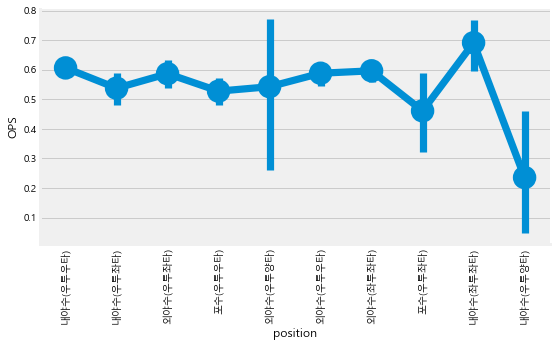

In [26]:
plt.rc('font',family='Malgun Gothic')
a=sns.factorplot('position','OPS',data=regular,size=4,aspect=2)
a.set_xticklabels(rotation=90)

In [81]:
def get_self_corr(var,regular=regular):
    x=[]
    y=[]
    regular1=regular.loc[regular['AB']>=50,]
    for name in regular1['batter_name'].unique():
        a=regular1.loc[regular1['batter_name']==name,].sort_values('year')
        k=[]
        for i in a['year'].unique():
            if (a['year']==i+1).sum()==1:
                k.append(i)
        for i in k:
            x.append(a.loc[a['year']==i,var].iloc[0])
            y.append(a.loc[a['year']==i+1,var].iloc[0])
    plt.scatter(x,y)
    plt.title(var)
    plt.show()
    print(pd.Series(x).corr(pd.Series(y))**2)

regular['1B']=regular['H']-regular['2B']-regular['3B']-regular['HR']

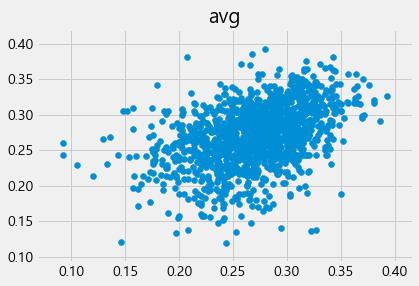

0.17987194251531388


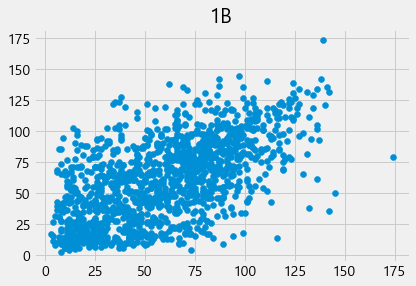

0.35794510349669717


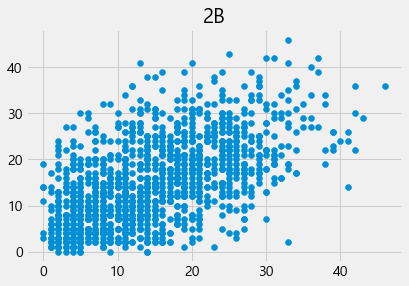

0.3216523588655753


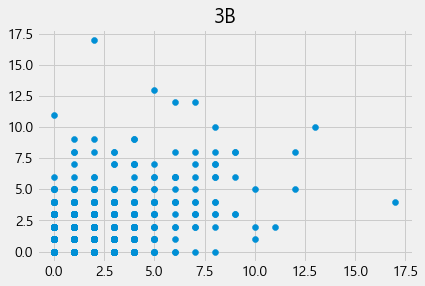

0.2001112514921486


In [82]:
for i in ['avg','1B','2B','3B']:
    get_self_corr(i)

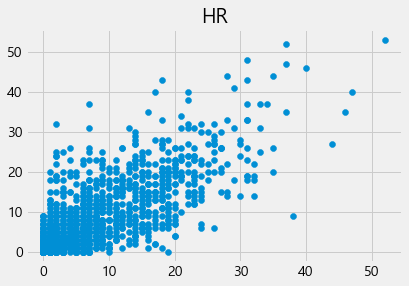

0.5505976292944429


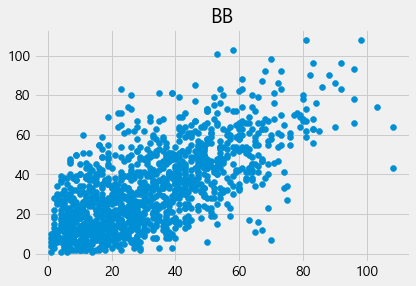

0.45402052125978987


In [83]:
for i in ['HR','BB']:
    get_self_corr(i)

In [84]:
regular['1b_luck']=regular['1B']/(regular['AB']-regular['HR']-regular['SO'])
regular['2b_luck']=regular['2B']/(regular['AB']-regular['HR']-regular['SO'])
regular['3b_luck']=regular['3B']/(regular['AB']-regular['HR']-regular['SO'])

In [85]:
regular.loc[regular['year']==2019].head()

batter_id batter_name  year team  avg  G  AB  R  H  2B  ...  height/weight  \
0          1         강경학  2019    0  0.0  0   0  0  0   0  ...     180cm/72kg   
1          2         강구성  2019    0  0.0  0   0  0  0   0  ...     180cm/82kg   
2          3         강민국  2019    0  0.0  0   0  0  0   0  ...     176cm/80kg   
3          4         강민호  2019    0  0.0  0   0  0  0   0  ...    185cm/100kg   
4          5         강백호  2019    0  0.0  0   0  0  0   0  ...     184cm/98kg   

       year_born   position  career  starting_salary  OPS  1B  1b_luck  \
0  1992년 08월 11일  내야수(우투좌타)       0          10000만원  0.0   0      NaN   
1  1993년 06월 09일  외야수(우투좌타)       0           9000만원  0.0   0      NaN   
2  1992년 01월 10일  내야수(우투우타)       0          20000만원  0.0   0      NaN   
3  1985년 08월 18일   포수(우투우타)       0           9000만원  0.0   0      NaN   
4  1999년 07월 29일  외야수(우투좌타)       0          45000만원  0.0   0      NaN   

   2b_luck  3b_luck  
0      NaN      NaN  
1      NaN      NaN  
2      NaN      NaN  
3      NaN      NaN  
4      NaN      NaN  

[5 rows x 33 columns]

In [33]:
for j in ['avg', 'G', 'AB', 'R', 'H','2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP','SLG', 'OBP', 'E','1b_luck','2b_luck','3b_luck']:
    lag_1_avg=[]
    for i in range(len(regular)): 
        if len(regular.loc[(regular['batter_name']==regular['batter_name'].iloc[i])&(regular['year']==regular['year'].iloc[i]-1)][j])==0:
            lag_1_avg.append(np.nan)
        else:
            lag_1_avg.append(regular.loc[(regular['batter_name']==regular['batter_name'].iloc[i])&(regular['year']==regular['year'].iloc[i]-1)][j].iloc[0])
    
    regular['lag_1_'+j]=lag_1_avg
    print(j)

avg
G
AB
R
H
2B
3B
HR
TB
RBI
SB
CS
BB
HBP
SO
GDP
SLG
OBP
E
1b_luck
2b_luck
3b_luck


In [37]:
def get_nujuk(name,year,var):
    if (len(regular.loc[(regular['batter_name']==name)&(regular['year']<year-1),'H'])!=0):
        return regular.loc[(regular['batter_name']==name)&(regular['year']<year-1),var].sum()
    else:
        return np.nan

for i in ['G', 'AB', 'R', 'H','2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO']:
    regular['total_'+i]=regular.apply(lambda x: get_nujuk(x['batter_name'],x['year'],i),axis=1)
    print(i)

G
AB
R
H
2B
3B
HR
TB
RBI
SB
CS
BB
HBP
SO


In [38]:
regular['year'].value_counts()

2018    226
2019    220
2017    216
2016    212
2015    205
2013    190
2014    185
2012    174
2011    151
2010    130
2009    121
2008    112
2007     94
2006     83
2005     73
2004     68
2003     54
2002     40
2001     32
2000     19
1999     14
1998     10
1997      8
1996      7
1994      2
1995      1
1993      1
Name: year, dtype: int64

In [54]:
regular.columns

Index(['batter_id', 'batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E', 'height/weight', 'year_born', 'position', 'career',
       'starting_salary', 'OPS', '1B', '1b_luck', '2b_luck', '3b_luck',
       'lag_1_avg', 'lag_1_G', 'lag_1_AB', 'lag_1_R', 'lag_1_H', 'lag_1_2B',
       'lag_1_3B', 'lag_1_HR', 'lag_1_TB', 'lag_1_RBI', 'lag_1_SB', 'lag_1_CS',
       'lag_1_BB', 'lag_1_HBP', 'lag_1_SO', 'lag_1_GDP', 'lag_1_SLG',
       'lag_1_OBP', 'lag_1_E', 'lag_1_1b_luck', 'lag_1_2b_luck',
       'lag_1_3b_luck', 'total_G', 'total_AB', 'total_R', 'total_H',
       'total_2B', 'total_3B', 'total_HR', 'total_TB', 'total_RBI', 'total_SB',
       'total_CS', 'total_BB', 'total_HBP', 'total_SO'],
      dtype='object')

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
train=regular.loc[regular['year']<=2017,]
test=regular.loc[regular['year']==2018,]
y_train=train['OPS']
X_train=train[[x for x in regular.columns if ('lag' in x)|('total' in x)]]

y_test=test['OPS']
X_test=test[[x for x in regular.columns if ('lag' in x)|('total' in x)]]

In [57]:
rf=RandomForestRegressor(n_estimators=500)
rf.fit(X_train.fillna(-1),y_train,sample_weight=train['AB'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [58]:
pred=rf.predict(X_test.fillna(-1))

In [59]:
real=test['OPS']
ab=test['AB']

from sklearn.metrics import mean_squared_error
mean_squared_error(real,pred,sample_weight=ab)**0.5

0.126222199473701

In [60]:
train=regular.loc[regular['year']<=2018,]
test=regular.loc[regular['year']==2019,]
y_train=train['OPS']
X_train=train[[x for x in regular.columns if ('lag' in x)|('total' in x)]]


rf=RandomForestRegressor(n_estimators=500)
rf.fit(X_train.fillna(-1),y_train,sample_weight=train['AB'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [61]:
test=regular.loc[regular['year']==2019,]

In [62]:
print(test)

     batter_id batter_name  year team  avg  G  AB  R  H  2B  ...  total_2B  \
0            1         강경학  2019    0  0.0  0   0  0  0   0  ...      14.0   
1            2         강구성  2019    0  0.0  0   0  0  0   0  ...       1.0   
2            3         강민국  2019    0  0.0  0   0  0  0   0  ...       1.0   
3            4         강민호  2019    0  0.0  0   0  0  0   0  ...     247.0   
4            5         강백호  2019    0  0.0  0   0  0  0   0  ...       NaN   
..         ...         ...   ...  ...  ... ..  .. .. ..  ..  ...       ...   
215        337         홍재호  2019    0  0.0  0   0  0  0   0  ...       9.0   
216        338         홍창기  2019    0  0.0  0   0  0  0   0  ...       0.0   
217        341         황윤호  2019    0  0.0  0   0  0  0   0  ...       0.0   
218        342         황재균  2019    0  0.0  0   0  0  0   0  ...     223.0   
219        344         황진수  2019    0  0.0  0   0  0  0   0  ...       7.0   

     total_3B  total_HR  total_TB  total_RBI  total_SB  total_C

In [50]:
pred=rf.predict(test[[x for x in regular.columns if ('lag' in x)|('total' in x)]].fillna(-1))

In [51]:
pd.DataFrame({'batter_id':test['batter_id'],'OPS':pred}).to_csv("d:\\data\\baseball\\baseline_submission.csv",index=False)